# Perkenalan

'================================================='

Milestone 2

Nama  : Ridwan Muhammad Syahrul

Batch : RMT-029

Program ini dimaksudkan untuk membuat model classification berupa SVM, KNN, Random Forest, Decision Tree, dan Boosting untuk memprediksi apakah sebuah kartu kredit merupakan kartu kredit fraud atau bukan.

'================================================='

# A. Library Import

In [1]:
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# Data Train Library
from sklearn.model_selection import train_test_split

# Outlier Handling Library
from feature_engine.outliers import Winsorizer

# Correlation Library
from scipy.stats import chi2_contingency
from scipy.stats import kendalltau

# Feature Scaling, Encoding, and Pipeline Library
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model Library
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score, make_scorer

# Model Saving Library
import pickle
import json

# B. Data Loading

Data set yang digunakan diambil dari website Kaggle. Berikut adalah link data:

https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction?resource=download

In [2]:
# Load dataset
df  = pd.read_csv('fraud test.csv')

df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
trans_date_trans_time,21/06/2020 12:14,21/06/2020 12:14,21/06/2020 12:14,21/06/2020 12:15,21/06/2020 12:15,21/06/2020 12:15,21/06/2020 12:15,21/06/2020 12:15,21/06/2020 12:16,21/06/2020 12:16
cc_num,2291160000000000.0,3573030000000000.0,3598220000000000.0,3591920000000000.0,3526830000000000.0,30407700000000.0,213181000000000.0,3589290000000000.0,3596360000000000.0,3546900000000000.0
merchant,fraud_Kirlin and Sons,fraud_Sporer-Keebler,"fraud_Swaniawski, Nitzsche and Welch",fraud_Haley Group,fraud_Johnston-Casper,fraud_Daugherty LLC,fraud_Romaguera Ltd,fraud_Reichel LLC,"fraud_Goyette, Howell and Collier",fraud_Kilback Group
category,personal_care,personal_care,health_fitness,misc_pos,travel,kids_pets,health_fitness,personal_care,shopping_pos,food_dining
amt,2.86,29.84,41.28,60.05,3.19,19.55,133.93,10.37,4.37,66.54
first,Jeff,Joanne,Ashley,Brian,Nathan,Danielle,Kayla,Paula,David,Kayla
last,Elliott,Williams,Lopez,Williams,Massey,Evans,Sutton,Estrada,Everett,Obrien
gender,M,F,F,M,M,F,F,F,M,F
street,351 Darlene Green,3638 Marsh Union,9333 Valentine Point,32941 Krystal Mill Apt. 552,5783 Evan Roads Apt. 465,76752 David Lodge Apt. 064,010 Weaver Land,350 Stacy Glens,4138 David Fall,7921 Robert Port Suite 343


Indikasi setiap kolom yang tersedia pada dataset:

1. Trans_date_trans_time: 
- Timestamp of the transaction (date and time).

2. Cc_num:
- Unique customer identification number.

3. Merchant:
- The merchant involved in the transaction.

4. Category:
- Transaction type (e.g., personal, childcare).

5. Amt:
- Transaction amount.

6. First:
- Cardholder's first name.

7. Last:
- Cardholder's last name.

8. Gender: 
- Cardholder's gender.

9. Street: 
- Cardholder's street address.

10. City: 
- Cardholder's city of residence.

11. State: 
- Cardholder's state of residence.

12. Zip: 
- Cardholder's zip code.

13. Lat:
- Latitude of cardholder's location.

14. Long: 
- Longitude of cardholder's location.

15. City_pop:
- Population of the cardholder's city.

16. Job:
- Cardholder's job title.

17. Dob: 
- Cardholder's date of birth.

18. Trans_num: 
- Unique transaction identifier.

19. Unix_time: 
- Transaction timestamp (Unix format).

20. Merch_lat:
- Merchant's location (latitude).

21. Merch_long: 
- Merchant's location (longitude).

22. Is_fraud:
- Fraudulent transaction indicator (1 = fraud, 0 = legitimate)

In [7]:
df[df['is_fraud']== 1].T

,1685,1767,1781,1784,1857,1891,1906,1956,1968,2026,...,511272,511374,511675,512502,514913,517197,517274,517341,517529,517571
Unnamed: 0,1685,1767,1781,1784,1857,1891,1906,1956,1968,2026,...,511272,511374,511675,512502,514913,517197,517274,517341,517529,517571
trans_date_trans_time,21/06/2020 22:06,21/06/2020 22:32,21/06/2020 22:37,21/06/2020 22:38,21/06/2020 23:02,21/06/2020 23:16,21/06/2020 23:21,21/06/2020 23:35,21/06/2020 23:40,21/06/2020 23:59,...,21/12/2020 22:42,21/12/2020 22:59,21/12/2020 23:57,22/12/2020 03:56,22/12/2020 14:30,22/12/2020 22:05,22/12/2020 22:18,22/12/2020 22:31,22/12/2020 23:06,22/12/2020 23:13
cc_num,3560730000000000.0,6564460000000000.0,6564460000000000.0,4005680000000000.0,3560730000000000.0,3524570000000000.0,4005680000000000.0,4005680000000000.0,4005680000000000.0,6564460000000000.0,...,4716560000000000.0,4716560000000000.0,2242180000000000.0,2242180000000000.0,2242180000000000.0,2242180000000000.0,2242180000000000.0,2242180000000000.0,2242180000000000.0,2242180000000000.0
merchant,fraud_Hamill-D'Amore,"fraud_Rodriguez, Yost and Jenkins",fraud_Nienow PLC,"fraud_Heathcote, Yost and Kertzmann",fraud_Hermann and Sons,fraud_Thompson-Gleason,fraud_Kuhic LLC,"fraud_Reichert, Rowe and Mraz","fraud_Kihn, Abernathy and Douglas",fraud_Lemke-Gutmann,...,fraud_Schulist Ltd,fraud_Botsford and Sons,"fraud_Zboncak, Rowe and Murazik",fraud_Mraz-Herzog,fraud_Predovic Inc,"fraud_Willms, Kris and Bergnaum",fraud_Kuhn LLC,"fraud_Mosciski, Ziemann and Farrell",fraud_Bauch-Raynor,fraud_Jaskolski-Vandervort
category,health_fitness,misc_net,entertainment,shopping_net,shopping_pos,health_fitness,shopping_net,shopping_net,shopping_net,shopping_net,...,food_dining,home,shopping_net,gas_transport,shopping_net,shopping_pos,shopping_pos,shopping_net,grocery_pos,misc_net
amt,24.84,780.52,620.33,1077.69,842.65,22.55,1128.26,931.82,983.0,955.16,...,123.58,219.11,981.22,6.6,997.77,1041.51,868.09,1039.42,289.27,766.38
first,Brooke,Douglas,Douglas,William,Brooke,Ashley,William,William,William,Douglas,...,Lauren,Lauren,Travis,Travis,Travis,Travis,Travis,Travis,Travis,Travis
last,Smith,Willis,Willis,Perry,Smith,Cabrera,Perry,Perry,Perry,Willis,...,Anderson,Anderson,Daniel,Daniel,Daniel,Daniel,Daniel,Daniel,Daniel,Daniel
gender,F,M,M,M,F,F,M,M,M,M,...,F,F,M,M,M,M,M,M,M,M
street,63542 Luna Brook Apt. 012,619 Jeremy Garden Apt. 681,619 Jeremy Garden Apt. 681,458 Phillips Island Apt. 768,63542 Luna Brook Apt. 012,94225 Smith Springs Apt. 617,458 Phillips Island Apt. 768,458 Phillips Island Apt. 768,458 Phillips Island Apt. 768,619 Jeremy Garden Apt. 681,...,11014 Chad Lake Apt. 573,11014 Chad Lake Apt. 573,1327 Rose Causeway Apt. 610,1327 Rose Causeway Apt. 610,1327 Rose Causeway Apt. 610,1327 Rose Causeway Apt. 610,1327 Rose Causeway Apt. 610,1327 Rose Causeway Apt. 610,1327 Rose Causeway Apt. 610,1327 Rose Causeway Apt. 610


In [3]:
df.tail(10).T

,555709,555710,555711,555712,555713,555714,555715,555716,555717,555718
Unnamed: 0,555709,555710,555711,555712,555713,555714,555715,555716,555717,555718
trans_date_trans_time,31/12/2020 23:57,31/12/2020 23:57,31/12/2020 23:57,31/12/2020 23:58,31/12/2020 23:58,31/12/2020 23:59,31/12/2020 23:59,31/12/2020 23:59,31/12/2020 23:59,31/12/2020 23:59
cc_num,30344700000000.0,3524570000000000.0,341546000000000.0,501803000000.0,3523840000000000.0,30560600000000.0,3556610000000000.0,6011720000000000.0,4079770000000.0,4170690000000000.0
merchant,"fraud_Larkin, Stracke and Greenfelder","fraud_Heathcote, Yost and Kertzmann",fraud_Schmidt-Larkin,"fraud_Pouros, Walker and Spencer","fraud_Prosacco, Kreiger and Kovacek",fraud_Reilly and Sons,fraud_Hoppe-Parisian,fraud_Rau-Robel,fraud_Breitenberg LLC,fraud_Dare-Marvin
category,entertainment,shopping_net,home,kids_pets,home,health_fitness,kids_pets,kids_pets,travel,entertainment
amt,46.71,29.56,12.68,13.02,17.0,43.77,111.84,86.88,7.99,38.13
first,Christine,Ashley,Mark,Robert,Grace,Michael,Jose,Ann,Eric,Samuel
last,Johnson,Cabrera,Brown,Flores,Williams,Olson,Vasquez,Lawson,Preston,Frey
gender,F,F,M,M,F,M,M,F,M,M
street,8011 Chapman Tunnel Apt. 568,94225 Smith Springs Apt. 617,8580 Moore Cove,3277 Fields Meadows Apt. 790,28812 Charles Mill Apt. 628,558 Michael Estates,572 Davis Mountains,144 Evans Islands Apt. 683,7020 Doyle Stream Apt. 951,830 Myers Plaza Apt. 384


In [4]:
#Mengecek informasi dataset secara keseluruhan
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [17]:
df.shape

(555719, 22)

Terdapat 555719 total data dan 22 jenis kolom pada dataset

Kolom Unnamed: 0  tidak terkait dengan dataset jadi bisa di drop

In [16]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [32]:
# Memisahkan tanggal dan waktu dari kolom trans_date_trans_time
date_time = pd.to_datetime(df['trans_date_trans_time'], format='%d/%m/%Y %H:%M')

df['trans_date'] = date_time.dt.date[0]
df['trans_time'] = date_time.dt.time[0]

In [35]:
df.drop('trans_date_trans_time', axis=1, inplace=True)

In [36]:
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12:14:00
1,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:00
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12:14:00
3,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12:14:00
4,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12:14:00


In [34]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


Didapatkan informasi general terkait data numerik yang ada pada dataset

In [18]:
# Mengecek nilai null yang ada pada dataset
df.isnull().sum() 

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Pada dataset ini, tidak memiliki value yang null sehingga pada feature selection tidak akan dilakukan missing value handling

In [19]:
# Mengecek apakah ada data yang duplikat
print('Data duplikat pada data set: ', df.duplicated().sum()) 

Data duplikat pada data set:  0


In [51]:
# Mengecek jumlah unique value pada masing-masing column
list_column = df.columns.tolist()

for x in list_column:
    print('Column', x, 'has unique value:', len(df[x].unique()))

Column cc_num has unique value: 904
Column merchant has unique value: 693


Column category has unique value: 14
Column amt has unique value: 37256
Column first has unique value: 341
Column last has unique value: 471
Column gender has unique value: 2
Column street has unique value: 924
Column city has unique value: 849
Column state has unique value: 50
Column zip has unique value: 912
Column lat has unique value: 910
Column long has unique value: 910
Column city_pop has unique value: 835
Column job has unique value: 478
Column dob has unique value: 910
Column trans_num has unique value: 555719
Column unix_time has unique value: 544760
Column merch_lat has unique value: 546490
Column merch_long has unique value: 551770
Column is_fraud has unique value: 2
Column trans_date has unique value: 1
Column trans_time has unique value: 1


# C. Exploratory Data Analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


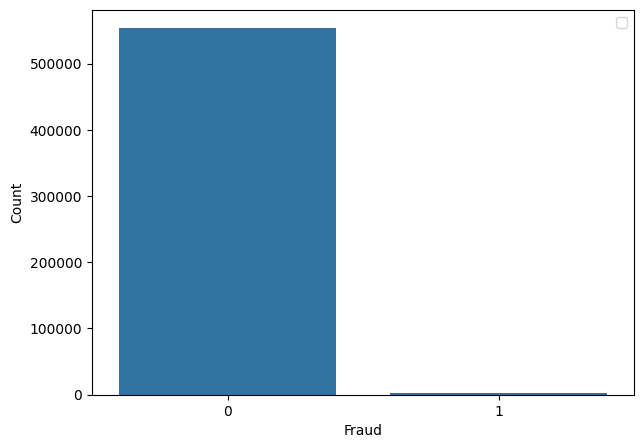

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [170]:
# Visualisasi data fraud
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(x = 'is_fraud', data = df)
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1,1))
plt.show()
df['is_fraud'].value_counts()

Dari hasil visualisasi yang didapatkan di atas, credit card yang fraud jumlahnya sangat sedikit dibandingkan dengan credit card yang legitimate

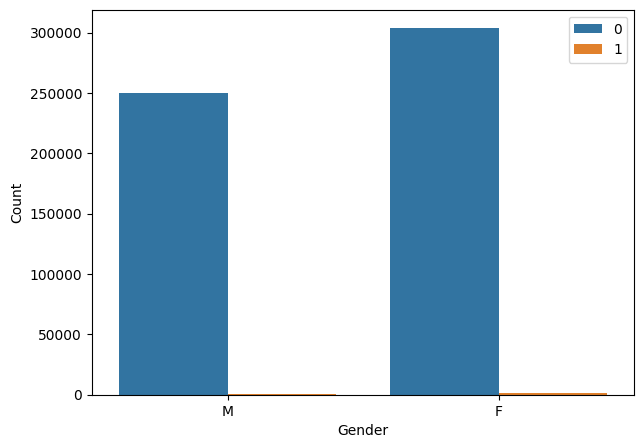

In [49]:
# Visualisasi data fraud berdasarkan gender
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(x = 'gender', data = df, hue = 'is_fraud')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [8]:
df_count = df.groupby('gender')['is_fraud'].apply(lambda x: (x==1).sum()).reset_index(name='count')

print(df_count)

  gender  count
0      F   1164
1      M    981


In [9]:
df['gender'].value_counts()

gender
F    304886
M    250833
Name: count, dtype: int64

Dari hasil visualisasi yang didapatkan mengenai data fraud berdasarkan gender, jumlah fraud lebih banyak pada gender Female

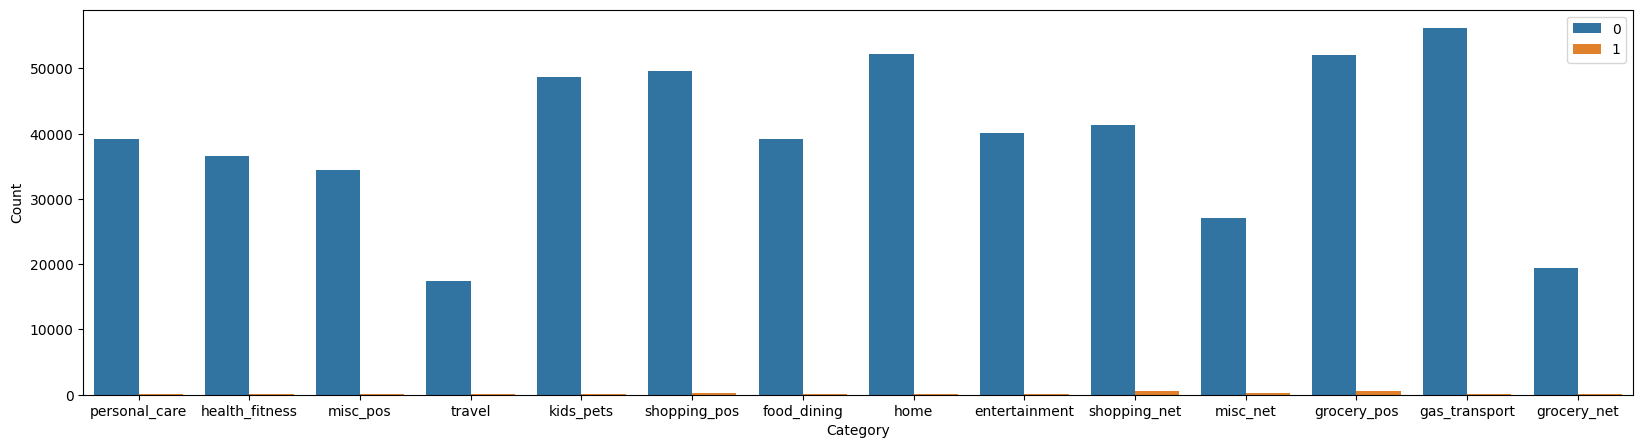

In [47]:
# Visualisasi data fraud berdasarkan category
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(x = 'category', data = df, hue = 'is_fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [12]:
df_count = df.groupby('category')['is_fraud'].apply(lambda x: (x==1).sum()).reset_index(name='count').sort_values(by='count', ascending=False)

print(df_count)

          category  count
11    shopping_net    506
4      grocery_pos    485
8         misc_net    267
12    shopping_pos    213
2    gas_transport    154
9         misc_pos     72
10   personal_care     70
6             home     67
7        kids_pets     65
0    entertainment     59
1      food_dining     54
5   health_fitness     52
3      grocery_net     41
13          travel     40


Dari hasil visualisasi yang didapatkan mengenai data fraud berdasarkan category, credit card fraud lebih sering terjadi pada transaksi tipe grocery_pos dan shopping_net

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


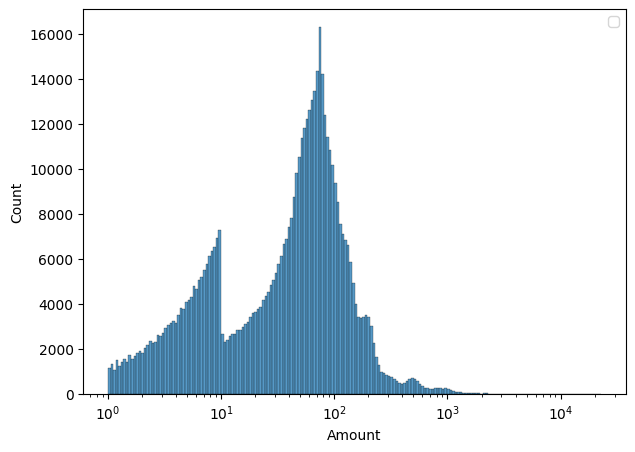

In [169]:
# Visualisasi Amount
fig, ax = plt.subplots(figsize=(7,5))
sns.histplot(df['amt'], log_scale=True)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# D. Feature Engineering

In [52]:
# Pembuatan dataframe baru untuk Feature Engineering
df_fe = df.copy()
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   cc_num      555719 non-null  float64
 1   merchant    555719 non-null  object 
 2   category    555719 non-null  object 
 3   amt         555719 non-null  float64
 4   first       555719 non-null  object 
 5   last        555719 non-null  object 
 6   gender      555719 non-null  object 
 7   street      555719 non-null  object 
 8   city        555719 non-null  object 
 9   state       555719 non-null  object 
 10  zip         555719 non-null  int64  
 11  lat         555719 non-null  float64
 12  long        555719 non-null  float64
 13  city_pop    555719 non-null  int64  
 14  job         555719 non-null  object 
 15  dob         555719 non-null  object 
 16  trans_num   555719 non-null  object 
 17  unix_time   555719 non-null  int64  
 18  merch_lat   555719 non-null  float64
 19  me

## D.1. Feature Selection

In [53]:
df_fe.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'trans_date', 'trans_time'],
      dtype='object')

In [171]:
# Mengelompokkan kolom yang bersifat numerikal dan kategorikal
num_col = [ 'amt', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long']
kat_col = ['cc_num', 'merchant', 'category', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'job',
       'dob', 'trans_num', 'trans_date', 'trans_time']

print('Data Numerik',num_col)
print('Data Kategorik',kat_col)

Data Numerik ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
Data Kategorik ['cc_num', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num', 'trans_date', 'trans_time']


Untuk Feature Selection pada kolom kategorikal, digunakan metode chi-square dikarenakan target yang dimiliki bertipe kategorikal.

In [56]:
# Feature selection Categorical columns
p_values = []
interpretasi = []
cols = []
for col in kat_col:
  contingency_table = pd.crosstab(df_fe[col], df_fe['is_fraud'])
  chi2 = chi2_contingency(contingency_table)
  chi2_pvalue= chi2.pvalue

  cols.append(col)
  p_values.append(chi2_pvalue)
  
  if chi2.pvalue < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('Tidak ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'p-value': p_values,
              'hasil': interpretasi})

,nama kolom,p-value,hasil
0,cc_num,0.000000e+00,ada korelasi
1,merchant,1.802227e-205,ada korelasi
2,category,0.000000e+00,ada korelasi
3,first,0.000000e+00,ada korelasi
4,last,0.000000e+00,ada korelasi
5,gender,5.922845e-01,Tidak ada korelasi
6,street,0.000000e+00,ada korelasi
7,city,0.000000e+00,ada korelasi
8,state,6.739749e-66,ada korelasi
9,zip,0.000000e+00,ada korelasi


Untuk Feature Selection pada kolom numerikal, digunakan metode kendalltau dikarenakan target yang dimiliki bertipe kategorikal.

In [57]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []
for col in num_col:
  corr_coef, p_value = kendalltau(df_fe[col], df_fe['is_fraud'])

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('Ada korelasi')
  else :
    interpretasi.append('Tidak ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'p-value': p_values,
              'hasil': interpretasi})

,nama kolom,p-value,hasil
0,amt,0.000000e+00,Ada korelasi
1,lat,1.435188e-04,Ada korelasi
2,long,8.199951e-01,Tidak ada korelasi
3,city_pop,4.912852e-03,Ada korelasi
4,unix_time,3.928005e-25,Ada korelasi
5,merch_lat,1.768835e-04,Ada korelasi
6,merch_long,7.533853e-01,Tidak ada korelasi


## D.2. Splitting Data

In [74]:
# Pembuatan dataframe yang akan digunakan untuk feature engineering
df_fe = df.copy()
df_fe.head().T

,0,1,2,3,4
cc_num,2291160000000000.0,3573030000000000.0,3598220000000000.0,3591920000000000.0,3526830000000000.0
merchant,fraud_Kirlin and Sons,fraud_Sporer-Keebler,"fraud_Swaniawski, Nitzsche and Welch",fraud_Haley Group,fraud_Johnston-Casper
category,personal_care,personal_care,health_fitness,misc_pos,travel
amt,2.86,29.84,41.28,60.05,3.19
first,Jeff,Joanne,Ashley,Brian,Nathan
last,Elliott,Williams,Lopez,Williams,Massey
gender,M,F,F,M,M
street,351 Darlene Green,3638 Marsh Union,9333 Valentine Point,32941 Krystal Mill Apt. 552,5783 Evan Roads Apt. 465
city,Columbia,Altonah,Bellmore,Titusville,Falmouth
state,SC,UT,NY,FL,MI


Beberapa kolom akan di-drop seperti kolom:
- 'city', 'zip', dan 'street' di-drop dikarenakan cardinality yang terlalu tinggi, dan juga sudah bisa diwakilkan oleh kolom 'state' agar menghindari cardinality yang tinggi
- 'first' dan 'last' di-drop dikarenakan nama seseorang tidak memengaruhi credit card fraud
- 'cc_num', 'trans_num', 'trans_date', dan 'trans_time' di-drop karena tidak memiliki korelasi dengan target yang dipilih, yaitu kolom 'is_fraud'.

In [75]:
# Define X dan Y untuk modelling
X = df_fe.drop(columns=['is_fraud', 'first', 'last', 'city', 'zip', 'street', 'cc_num','trans_num','trans_date','trans_time', 'lat', 'long', 'merch_long', 'merch_lat', 'dob'], axis=1)
Y = df_fe[['is_fraud']]

In [76]:
X.columns

Index(['merchant', 'category', 'amt', 'gender', 'state', 'city_pop', 'job',
       'unix_time'],
      dtype='object')

In [77]:
# Splitting untuk Data Train dan Test

X_tr, X_ts, Y_tr, Y_ts = train_test_split(X,Y, test_size=0.3, random_state=4)
print ("Data Train X: ", X_tr.shape)
print ("Data Test X: ", X_ts.shape)
print ("Data Train Y: ", Y_tr.shape)
print ("Data Test Y: ", Y_ts.shape)

Data Train X:  (389003, 8)
Data Test X:  (166716, 8)
Data Train Y:  (389003, 1)
Data Test Y:  (166716, 1)


## D.3. Handling Outliers (Capping)

Sebelum mengatasi data outliers, perlu dicari nilai skewness pada masing-masing kolom

In [78]:
num_col2 = ['amt', 'city_pop', 'unix_time']
kat_col2 = ['merchant', 'category', 'gender', 'state', 'job']

In [79]:
# Looping untuk mencari skew setiap kolom kecuali kolom tertentu
skew_data = []
for col in num_col2:
    skew_value = X[col].skew()
    skew_status = 'Skew' if abs(skew_value) > 0.5 else 'Tidak Skew'
    skew_data.append({'Nama Kolom': col, 'Hasil Skew': skew_value, 'Status Skew': skew_status})

# Buat DataFrame dari hasil skewness
skew_df = pd.DataFrame(skew_data)
print(skew_df)

  Nama Kolom  Hasil Skew Status Skew
0        amt   37.134077        Skew
1   city_pop    5.583415        Skew
2  unix_time   -0.077405  Tidak Skew


Dari hasil perhitungan skew, seluruh kolom memiliki distribusi skew adalah amt dan city_pop, sedangkan sisanya terdistribusi secara normal. Oleh karena itu, data skew akan dihandling dengan cara Tukey's Rule (iqr) dan data tidak skew atau normal akan dihandling dengan cara Z-score (gaussian)

In [83]:
# Fungsi untuk membuat grafik sebelum dan sesudah handling outlier
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [80]:
# Capping menggunakan iqr karena data terdistribusi secara skew
winsoriser_all = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=['amt', 'city_pop'])

X_tr_capped = winsoriser_all.fit_transform(X_tr)
X_ts_capped = winsoriser_all.transform(X_ts)

In [81]:
# Capping menggunakan tukey's rule karena data terdistribusi secara normal
winsoriser_dis = Winsorizer(capping_method='gaussian',
                             tail='both',
                             fold=3,
                             variables=[ 'unix_time'])

X_tr_capped = winsoriser_dis.fit_transform(X_tr_capped)
X_ts_capped = winsoriser_dis.transform(X_ts_capped)

amt - Sebelum Capping


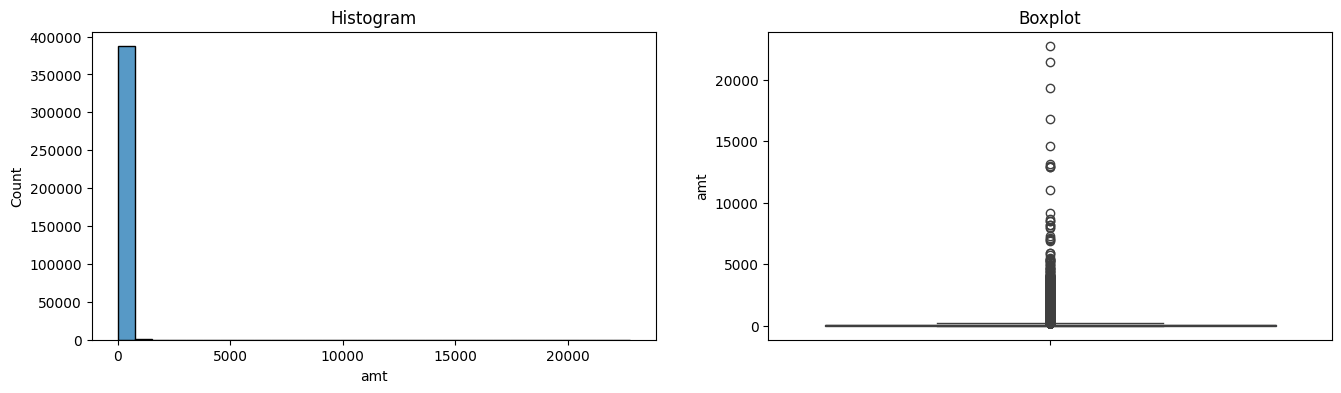


amt - Sesudah Capping


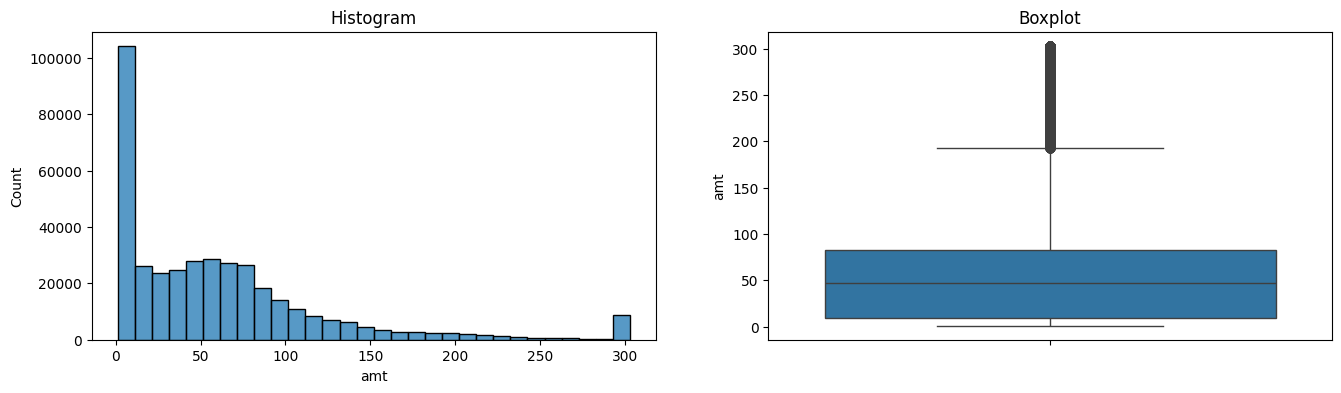

city_pop - Sebelum Capping


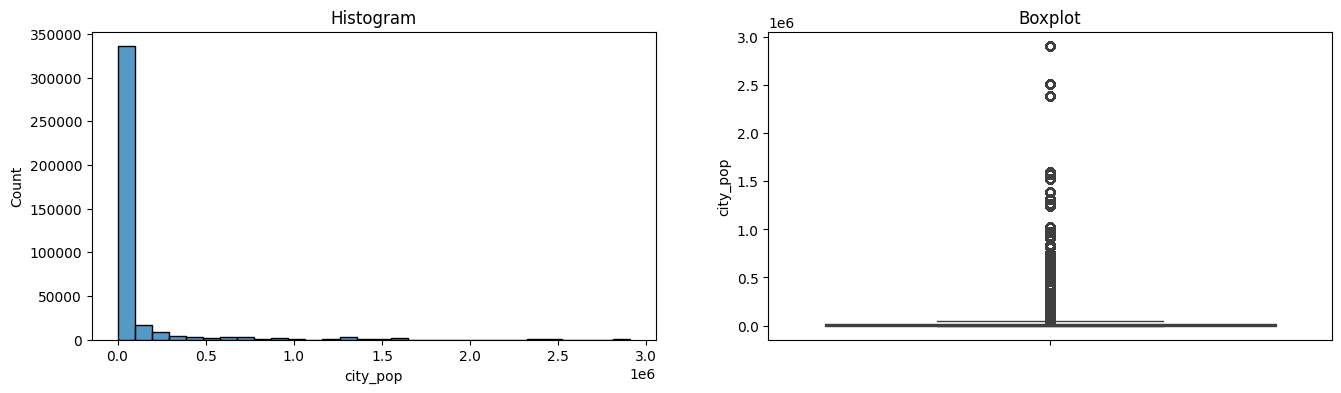


city_pop - Sesudah Capping


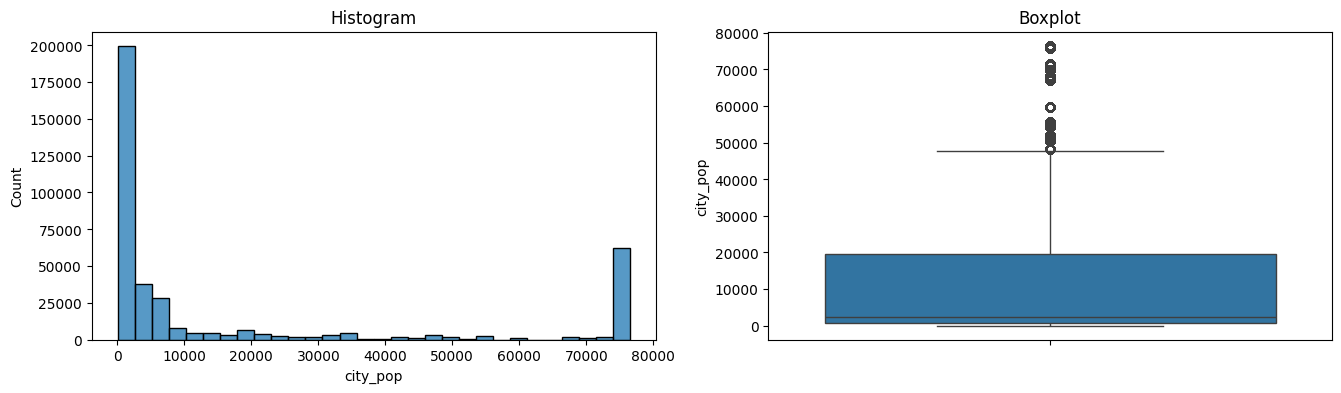

unix_time - Sebelum Capping


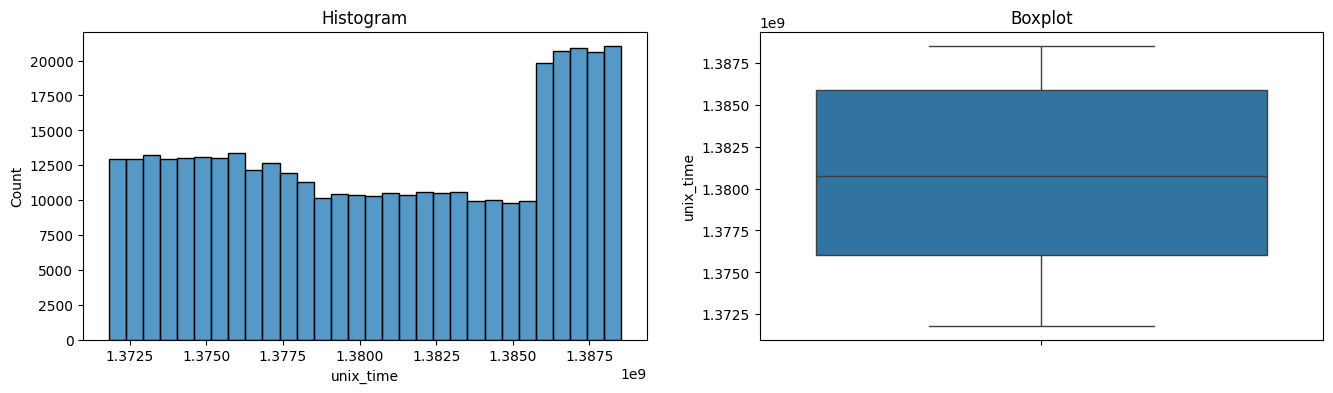


unix_time - Sesudah Capping


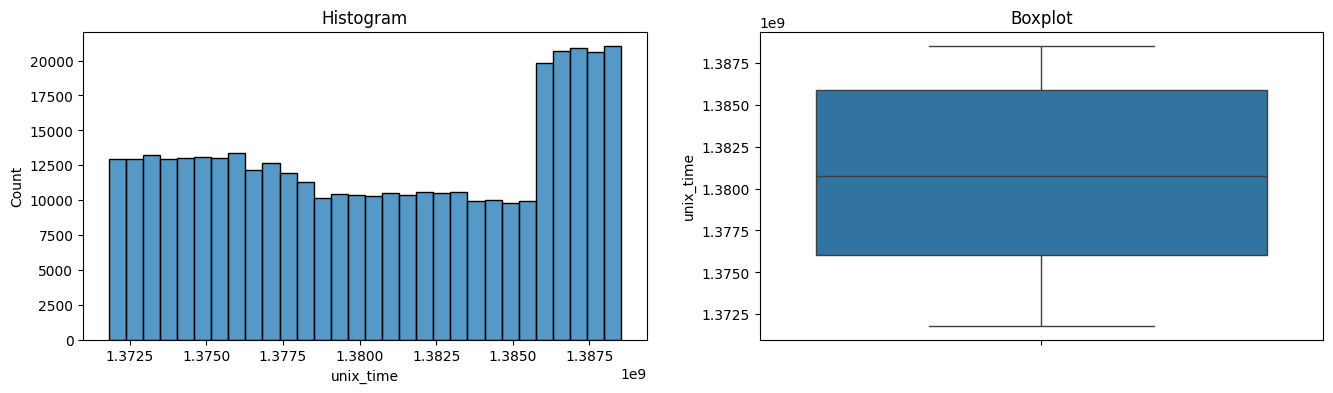

In [84]:
# Mengecek distribusi sebelum dan sesudah capping

# Cek distribusi setelah 
for col in num_col2:
  print(f'{col} - Sebelum Capping')
  diagnostic_plots(X_tr, col)

  print(f'\n{col} - Sesudah Capping')
  diagnostic_plots(X_tr_capped, col)

## D.4. Missing Value Handling

In [71]:
df.isnull().sum()

cc_num        0
merchant      0
category      0
amt           0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
trans_num     0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
trans_date    0
trans_time    0
dtype: int64

Pada dataset tidak terdapat missing value, sehingga missing value handling tidak perlu dilakukan

## E.5. Column Transformer

In [88]:
# Menjabarkan preprocessing agar dapat digunakan untuk pipeline
preprocessor = ColumnTransformer([
    ('numerik', RobustScaler(), num_col2), 
    ('kategorik', OrdinalEncoder(), kat_col2)
])

# F. Modelling

Metode yang akan digunakan adalah SVM, KNN, Decision Tree, Random Forest, dan Gradient Boost.

Classification info:
- 0 = legitimate
- 1 = fraud 

## F.1. SVM

### F.1.1. Baseline Model

#### Defining Baseline Model

In [89]:
# Defining with Pipeline
pipe_SVM = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf'))
])


#### Baseline Model Training

In [91]:
%%time

pipe_SVM.fit(X_tr_capped, Y_tr)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: total: 1min 29s
Wall time: 3min 39s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerik', RobustScaler(),
                                                  ['amt', 'city_pop',
                                                   'unix_time']),
                                                 ('kategorik', OrdinalEncoder(),
                                                  ['merchant', 'category',
                                                   'gender', 'state',
                                                   'job'])])),
                ('classifier', SVC())])

#### Baseline Model Evaluation

In [101]:
# Custom F1 Score untuk seluruh model

weightedF1Score = make_scorer(f1_score, average='weighted')

In [92]:
# Model Prediction

Y_pred_tr_SVM = pipe_SVM.predict(X_tr_capped)
Y_pred_ts_SVM = pipe_SVM.predict(X_ts_capped)
Y_pred_tr_SVM


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
# Model Evaluation - Train CV

f1_tr_CV_SVM = cross_val_score(pipe_SVM,
                                     X_tr_capped,
                                     Y_tr,
                                     cv=5,
                                     scoring=weightedF1Score)

print('F1 Score - All - Cross Validation  : ', f1_tr_CV_SVM)
print('F1 Score - Mean - Cross Validation : ', f1_tr_CV_SVM.mean())
print('F1 Score - Std - Cross Validation  : ', f1_tr_CV_SVM.std())
print('F1 Score - Range of Test-Set       : ', (f1_tr_CV_SVM.mean()-f1_tr_CV_SVM.std()) , '-', (f1_tr_CV_SVM.mean()+f1_tr_CV_SVM.std()))

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWar

F1 Score - All - Cross Validation  :  [0.99431601 0.99431601 0.99431601 0.99431594 0.99431594]
F1 Score - Mean - Cross Validation :  0.9943159843537585
F1 Score - Std - Cross Validation  :  3.5768711411509985e-08
F1 Score - Range of Test-Set       :  0.994315948585047 - 0.9943160201224699


F1 Score - Train Set  :  0.9943159843539836 



c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    387528
           1       0.00      0.00      0.00      1475

    accuracy                           1.00    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      1.00      0.99    389003
 

Confusion Matrix      : 


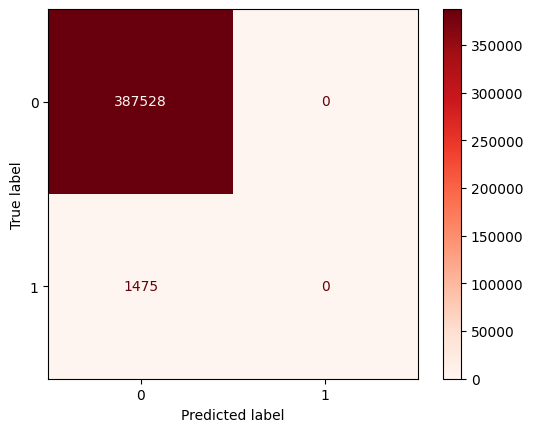

In [112]:
# Model Evaluation - Train

print('F1 Score - Train Set  : ', f1_score(Y_tr, Y_pred_tr_SVM, average='weighted'), '\n')
print('Classification Report : \n', classification_report(Y_tr, Y_pred_tr_SVM), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_SVM, X_tr_capped, Y_tr, cmap='Reds'))

F1 Score - Test Set  :  0.9939758301908843 



c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    166046
           1       0.00      0.00      0.00       670

    accuracy                           1.00    166716
   macro avg       0.50      0.50      0.50    166716
weighted avg       0.99      1.00      0.99    166716
 

Confusion Matrix      : 


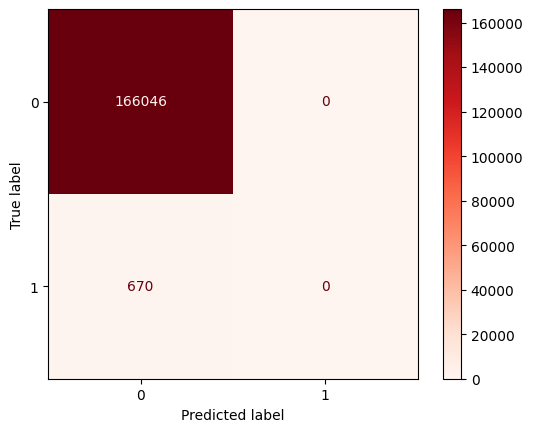

In [113]:
# Model Evaluation - Test
f1_ts_SVM = f1_score(Y_ts, Y_pred_ts_SVM, average='weighted')

print('F1 Score - Test Set  : ', f1_score(Y_ts, Y_pred_ts_SVM, average='weighted'), '\n')
print('Classification Report : \n', classification_report(Y_ts, Y_pred_ts_SVM), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_SVM, X_ts_capped, Y_ts, cmap='Reds'))

## F.2. K-Nearest Neighbor (KNN)

### F.2.1. Baseline Model

#### Defining Baseline Model

In [96]:
pipe_KNN = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

#### Baseline Model Training

In [97]:
%%time 

pipe_KNN.fit(X_tr_capped, Y_tr)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


CPU times: total: 1.05 s
Wall time: 3.39 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerik', RobustScaler(),
                                                  ['amt', 'city_pop',
                                                   'unix_time']),
                                                 ('kategorik', OrdinalEncoder(),
                                                  ['merchant', 'category',
                                                   'gender', 'state',
                                                   'job'])])),
                ('classifier', KNeighborsClassifier())])

#### Baseline Model Evaluation

In [98]:
# Model Prediction

Y_pred_tr_KNN = pipe_KNN.predict(X_tr_capped)
Y_pred_ts_KNN = pipe_KNN.predict(X_ts_capped)
Y_pred_tr_KNN

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
# Model Evaluation - Train

f1_tr_CV_KNN = cross_val_score(pipe_KNN,
                                     X_tr_capped,
                                     Y_tr,
                                     cv=5,
                                     scoring=weightedF1Score)

print('F1 Score - All - Cross Validation  : ', f1_tr_CV_KNN)
print('F1 Score - Mean - Cross Validation : ', f1_tr_CV_KNN.mean())
print('F1 Score - Std - Cross Validation  : ', f1_tr_CV_KNN.std())
print('F1 Score - Range of Test-Set       : ', (f1_tr_CV_KNN.mean()-f1_tr_CV_KNN.std()) , '-', (f1_tr_CV_KNN.mean()+f1_tr_CV_KNN.std()))

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversi

F1 Score - All - Cross Validation  :  [0.99430959 0.99431601 0.99430959 0.99431594 0.99431594]
F1 Score - Mean - Cross Validation :  0.9943134136854356
F1 Score - Std - Cross Validation  :  3.1246807750807012e-06
F1 Score - Range of Test-Set       :  0.9943102890046605 - 0.9943165383662107


F1 Score - Test Set   :  0.9939877788833308 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    166046
           1       0.50      0.00      0.00       670

    accuracy                           1.00    166716
   macro avg       0.75      0.50      0.50    166716
weighted avg       0.99      1.00      0.99    166716
 

Confusion Matrix      : 


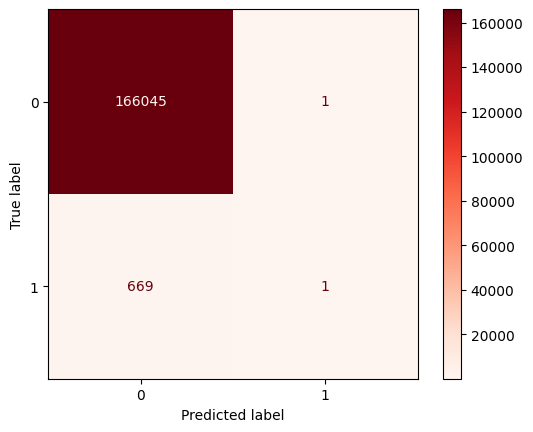

In [104]:
# Model Evaluation - Test

f1_ts_KNN = f1_score(Y_ts, Y_pred_ts_KNN, average='weighted')

print('F1 Score - Test Set   : ', f1_ts_KNN, '\n')
print('Classification Report : \n', classification_report(Y_ts, Y_pred_ts_KNN), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_KNN, X_ts_capped, Y_ts, cmap='Reds'))

## F.3. Decision Tree

### F.3.1 Baseline Model

#### Baseline Model Definition

In [107]:
pipe_DT = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

#### Baseline Model Training

In [108]:
%%time

pipe_DT.fit(X_tr_capped, Y_tr)

CPU times: total: 1.62 s
Wall time: 5.38 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerik', RobustScaler(),
                                                  ['amt', 'city_pop',
                                                   'unix_time']),
                                                 ('kategorik', OrdinalEncoder(),
                                                  ['merchant', 'category',
                                                   'gender', 'state',
                                                   'job'])])),
                ('classifier', DecisionTreeClassifier())])

#### Baseline Model Evaluation

In [117]:
# Model Prediction

Y_pred_tr_DT = pipe_DT.predict(X_tr_capped)
Y_pred_ts_DT = pipe_DT.predict(X_ts_capped)
Y_pred_tr_DT

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [115]:
# Model Evaluation - Train

f1_tr_CV_DT = cross_val_score(pipe_DT,
                                     X_tr_capped,
                                     Y_tr,
                                     cv=5,
                                     scoring=weightedF1Score)

print('F1 Score - All - Cross Validation  : ', f1_tr_CV_DT)
print('F1 Score - Mean - Cross Validation : ', f1_tr_CV_DT.mean())
print('F1 Score - Std - Cross Validation  : ', f1_tr_CV_DT.std())
print('F1 Score - Range of Test-Set       : ', (f1_tr_CV_DT.mean()-f1_tr_CV_DT.std()) , '-', (f1_tr_CV_DT.mean()+f1_tr_CV_DT.std()))

F1 Score - All - Cross Validation  :  [0.99685932 0.99677882 0.99686338 0.9966097  0.9964529 ]
F1 Score - Mean - Cross Validation :  0.9967128226966663
F1 Score - Std - Cross Validation  :  0.00015917303269279327
F1 Score - Range of Test-Set       :  0.9965536496639735 - 0.996871995729359


F1 Score - Test Set   :  0.9966420353891489 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    166046
           1       0.56      0.63      0.59       670

    accuracy                           1.00    166716
   macro avg       0.78      0.81      0.80    166716
weighted avg       1.00      1.00      1.00    166716
 

Confusion Matrix      : 


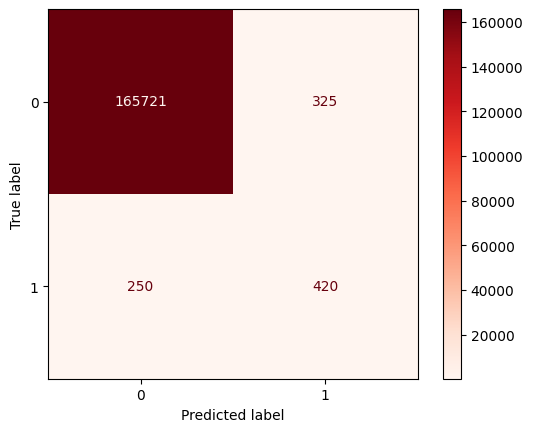

In [116]:
# Model Evaluation - Test

f1_ts_DT = f1_score(Y_ts, Y_pred_ts_DT, average='weighted')

print('F1 Score - Test Set   : ', f1_ts_DT, '\n')
print('Classification Report : \n', classification_report(Y_ts, Y_pred_ts_DT), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_DT, X_ts_capped, Y_ts, cmap='Reds'))

## F.4. Random Forest

### F.4.1 Baseline Model

#### Baseline Model Definition

In [109]:
# menjabarkan model menggunakan Random Forest
pipe_RF = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

#### Baseline Model Training

In [111]:
%%time

pipe_RF.fit(X_tr_capped, Y_tr)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


CPU times: total: 47 s
Wall time: 1min 32s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerik', RobustScaler(),
                                                  ['amt', 'city_pop',
                                                   'unix_time']),
                                                 ('kategorik', OrdinalEncoder(),
                                                  ['merchant', 'category',
                                                   'gender', 'state',
                                                   'job'])])),
                ('classifier', RandomForestClassifier())])

#### Baseline Model Evaluation

In [118]:
# Model Prediction

Y_pred_tr_RF = pipe_RF.predict(X_tr_capped)
Y_pred_ts_RF = pipe_RF.predict(X_ts_capped)
Y_pred_tr_RF

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [119]:
# Model Evaluation - Train

f1_tr_CV_RF = cross_val_score(pipe_RF,
                                     X_tr_capped,
                                     Y_tr,
                                     cv=5,
                                     scoring=weightedF1Score)

print('F1 Score - All - Cross Validation  : ', f1_tr_CV_RF)
print('F1 Score - Mean - Cross Validation : ', f1_tr_CV_RF.mean())
print('F1 Score - Std - Cross Validation  : ', f1_tr_CV_RF.std())
print('F1 Score - Range of Test-Set       : ', (f1_tr_CV_RF.mean()-f1_tr_CV_RF.std()) , '-', (f1_tr_CV_RF.mean()+f1_tr_CV_RF.std()))

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: 

F1 Score - All - Cross Validation  :  [0.99728123 0.99711064 0.99707131 0.99704309 0.99713467]
F1 Score - Mean - Cross Validation :  0.9971281887783798
F1 Score - Std - Cross Validation  :  8.276499038846274e-05
F1 Score - Range of Test-Set       :  0.9970454237879913 - 0.9972109537687683


F1 Score - Test Set   :  0.9972954179875878 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    166046
           1       0.96      0.45      0.61       670

    accuracy                           1.00    166716
   macro avg       0.98      0.72      0.81    166716
weighted avg       1.00      1.00      1.00    166716
 

Confusion Matrix      : 


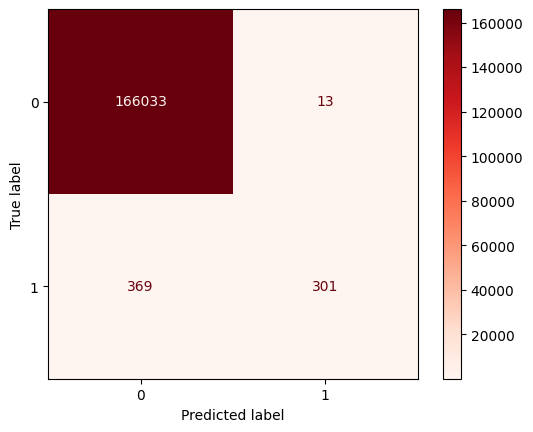

In [120]:
# Model Evaluation - Test

f1_ts_RF = f1_score(Y_ts, Y_pred_ts_RF, average='weighted')

print('F1 Score - Test Set   : ', f1_ts_RF, '\n')
print('Classification Report : \n', classification_report(Y_ts, Y_pred_ts_RF), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_RF, X_ts_capped, Y_ts, cmap='Reds'))

## F.5. Boosting (Gradient Boosting)

### F.5.1. Baseline Model

#### Baseline Model Definition

In [121]:
pipe_GB = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

#### Baseline Model Training

In [123]:
%%time

pipe_GB.fit(X_tr_capped, Y_tr)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: total: 1min 4s
Wall time: 2min 42s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerik', RobustScaler(),
                                                  ['amt', 'city_pop',
                                                   'unix_time']),
                                                 ('kategorik', OrdinalEncoder(),
                                                  ['merchant', 'category',
                                                   'gender', 'state',
                                                   'job'])])),
                ('classifier', GradientBoostingClassifier())])

#### Model Evaluation

In [124]:
# Model Prediction

Y_pred_tr_GB = pipe_GB.predict(X_tr_capped)
Y_pred_ts_GB = pipe_GB.predict(X_ts_capped)
Y_pred_tr_GB

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [125]:
# Model Evaluation - Train

f1_tr_CV_GB = cross_val_score(pipe_GB,
                                     X_tr_capped,
                                     Y_tr,
                                     cv=5,
                                     scoring=weightedF1Score)

print('F1 Score - All - Cross Validation  : ', f1_tr_CV_GB)
print('F1 Score - Mean - Cross Validation : ', f1_tr_CV_GB.mean())
print('F1 Score - Std - Cross Validation  : ', f1_tr_CV_GB.std())
print('F1 Score - Range of Test-Set       : ', (f1_tr_CV_GB.mean()-f1_tr_CV_GB.std()) , '-', (f1_tr_CV_GB.mean()+f1_tr_CV_GB.std()))

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataC

F1 Score - All - Cross Validation  :  [0.99639187 0.99591623 0.9959798  0.99607989 0.99616117]
F1 Score - Mean - Cross Validation :  0.9961057926701521
F1 Score - Std - Cross Validation  :  0.00016576311493881807
F1 Score - Range of Test-Set       :  0.9959400295552133 - 0.9962715557850909


F1 Score - Test Set   :  0.9958975183937565 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    166046
           1       0.92      0.23      0.37       670

    accuracy                           1.00    166716
   macro avg       0.96      0.62      0.69    166716
weighted avg       1.00      1.00      1.00    166716
 

Confusion Matrix      : 


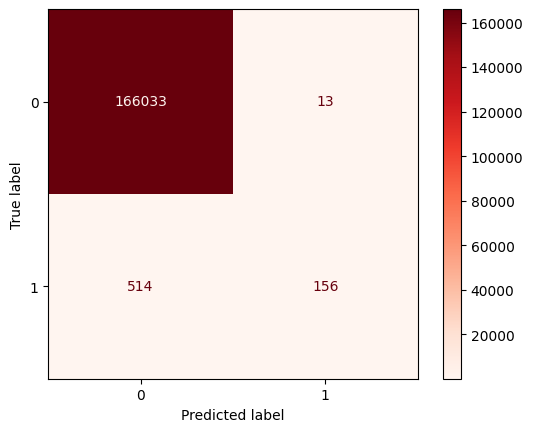

In [126]:
# Model Evaluation - Test

f1_ts_GB = f1_score(Y_ts, Y_pred_ts_GB, average='weighted')

print('F1 Score - Test Set   : ', f1_ts_GB, '\n')
print('Classification Report : \n', classification_report(Y_ts, Y_pred_ts_GB), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_GB, X_ts_capped, Y_ts, cmap='Reds'))

## F.6. Pemilihan Model terbaik

In [129]:
# mencari model terbaik
model = ['SVM', 'KNN', 'Decision Tree', 'Random Forest', 'GBoost']
model_tr_score = [round(f1_tr_CV_SVM.max(), 4), round(f1_tr_CV_KNN.max(), 4), round(f1_tr_CV_DT.max(), 4), round(f1_tr_CV_RF.max(), 4), round(f1_tr_CV_GB.max(), 4)]
model_ts_score = [round(f1_ts_SVM, 4), round(f1_ts_KNN, 4), round(f1_ts_DT, 4), round(f1_ts_RF, 4), round(f1_ts_GB, 4)]

pd.DataFrame(
    {'Model Name': model,
     'F1 Score - Train Set': model_tr_score,
     'F1 Score - Test Set': model_ts_score
    })

,Model Name,F1 Score - Train Set,F1 Score - Test Set
0,SVM,0.9943,0.9940
1,KNN,0.9943,0.9940
2,Decision Tree,0.9969,0.9966
3,Random Forest,0.9973,0.9973
4,GBoost,0.9964,0.9959


dari hasil yang didapatkan:
- Model Random Forest memiliki nilai F1 Score tertinggi baik di train set maupun test set
- Semua model yang digunakan memiliki fitting good fit

## F.7. Hyperparameter Tuning Model Terbaik

In [140]:
# Pemilihan parameter
param_grid = { 
    'classifier__n_estimators': [25, 50, 100, 150], 
    'classifier__max_features': ['sqrt', 'log2', None], 
    'classifier__max_depth': [3, 6, 9], 
    'classifier__max_leaf_nodes': [3, 6, 9] 
} 

In [141]:
random_CV_RF = RandomizedSearchCV(pipe_RF, 
                               param_distributions = param_grid,
                               cv=5,
                               n_iter=10,
                               random_state=25,
                               verbose=3,
                               n_jobs=-1)
# Fit the random search model
random_CV_RF.fit(X_tr_capped, Y_tr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numerik',
                                                                               RobustScaler(),
                                                                               ['amt',
                                                                                'city_pop',
                                                                                'unix_time']),
                                                                              ('kategorik',
                                                                               OrdinalEncoder(),
                                                                               ['merchant',
                                                                                'category',
                                                                                'gender',
                                                                                'state',
                                                                                'job'])])),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'classifier__max_depth': [3, 6, 9],
                                        'classifier__max_features': ['sqrt',
                                                                     'log2',
                                                                     None],
                                        'classifier__max_leaf_nodes': [3, 6, 9],
                                        'classifier__n_estimators': [25, 50,
                                                                     100,
                                                                     150]},
                   random_state=25, verbose=3)

In [142]:
# Mencari hyperparameter terbaik
random_CV_RF.best_params_

{'classifier__n_estimators': 100,
 'classifier__max_leaf_nodes': 6,
 'classifier__max_features': None,
 'classifier__max_depth': 6}

In [143]:
# menyimpan hyperparameter terbaik
random_CV_RF_best = random_CV_RF.best_estimator_

F1 Score - Train Set   :  0.9960391063076477 

F1 Score - Test Set   :  0.9957674995907296 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    166046
           1       0.99      0.21      0.34       670

    accuracy                           1.00    166716
   macro avg       0.99      0.60      0.67    166716
weighted avg       1.00      1.00      1.00    166716
 

Confusion Matrix      : 


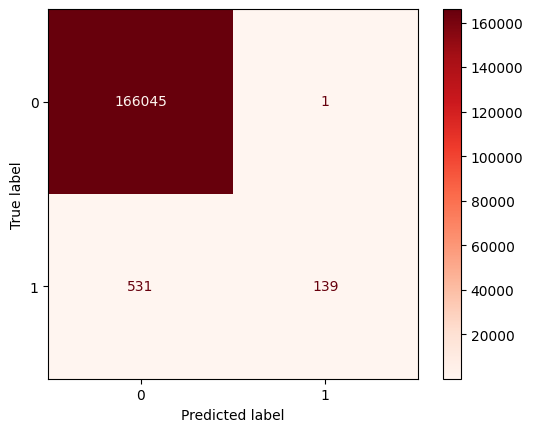

In [144]:
# Evaluasi model KNN
Y_best_tr = random_CV_RF_best.predict(X_tr_capped)
Y_best_ts = random_CV_RF_best.predict(X_ts_capped)
f1_best_tr = f1_score(Y_tr, Y_best_tr, average='weighted')
f1_best_ts = f1_score(Y_ts, Y_best_ts, average='weighted')

print('F1 Score - Train Set   : ', f1_best_tr, '\n')
print('F1 Score - Test Set   : ', f1_best_ts, '\n')
print('Classification Report : \n', classification_report(Y_ts, Y_best_ts), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(random_CV_RF_best, X_ts_capped, Y_ts, cmap='Reds'))

In [145]:
# membandingkan baseline KNN dengan Hyperparameter KNN
# mencari model terbaik
model2 = ['KNN Baseline', 'KNN Hyperparameter']
ModelTrainScore = [round(f1_tr_CV_RF.max(), 4), round(f1_best_tr, 4)]
ModelTestScore = [round(f1_ts_RF, 4), round(f1_best_ts, 4)]

pd.DataFrame(
    {'Model Name': model2,
     'F1 Score - Train Set': ModelTrainScore,
     'F1 Score - Test Set': ModelTestScore,
    })

,Model Name,F1 Score - Train Set,F1 Score - Test Set
0,KNN Baseline,0.9973,0.9973
1,KNN Hyperparameter,0.9960,0.9958


Setelah melakukan hyperparameter tuning dan mendapatkan hasilnya, RF baseline memiliki F1 Score yang lebih tinggi daripada RF dengan hyperparameter tuning, sehingga model yang akan dipakai adalah model baseline.

# G. Model Saving

In [148]:
# Save file list kolom numerikal
with open('list_num_col.txt', 'w') as file_1:
  json.dump(num_col2, file_1)

# Save file list kolom kategorikal
with open('list_kat_col.txt', 'w') as file_2:
  json.dump(kat_col2, file_2)

# Save model
with open('best_model.pkl', 'wb') as file_3:
  pickle.dump(pipe_RF, file_3)

# H. Conclusions

>
1. Insight EDA
- Dari barchart mengenai jumlah fraud, credit card yang fraud jumlahnya sangat sedikit dibandingkan dengan credit card  yang legitimate, sehingga dataset ini tergolong imbalance.
- Dari barchart mengenai data fraud dengan gender, credit card yang fraud lebih banyak dimiliki oleh Female, tetapi jumlah pemilik credit card Female lebih banyak daripada jumlah pemilik credit card Male, sehingga rasio pemilik credit card fraud Female dan Male hampir sama.
- Dari hasil visualisasi yang didapatkan mengenai data fraud berdasarkan category, credit card fraud lebih sering terjadi pada transaksi tipe grocery_pos dan shopping_net
2. Dari hasil Model Evaluation, didapatkan model RF dapat memprediksi data dengan lebih akurat dari pada model SVM, KNN, DT, dan Gradient Boost.

# Conceptual Problem


1. Bagging atau Bootstrap Aggregating, adalah teknik yang digunakan pada metode ensemble learning teknik untuk meningkatkan stabilitas dan akurasi algoritma machine learning. 

Cara kerja bagging:
- Pengambilan Sampel Bootstrap: 
Bagging melibatkan pembuatan beberapa subset dari kumpulan data asli dengan pengambilan sampel secara acak dengan penggantian. Ini berarti bahwa setiap subset dapat berisi duplikat data asli.
- Training Base Learner: 
Setelah membuat subset ini, algoritma base learning (decision tree, neural network, dll.) dilatih pada masing-masing subset tersebut secara independen. Setiap subset digunakan untuk melatih base learner yang terpisah.
- Menggabungkan Prediksi: 
Setelah semua base learner dilatih, prediksi akan digabungkan dalam beberapa cara untuk membuat prediksi akhir. Metode paling umum untuk menggabungkan prediksi adalah dengan merata-ratakan keluaran untuk problem case regresi atau mengambil suara terbanyak untuk problem case klasifikasi.

2. 
    - Random Forest bekerja dengan membuat kumpulan decision trees, setiap decision tree dibuat dari data yang dipilih secara acak, yang kemudian dari data itu akan dipilih fiturnya secara acak untuk membuat prediksi. Decision trees memiliki node dan branch sendiri-sendiri. Setiap node memiliki fitur sendiri yang telah dikelompokan bedasarkan kriteria pada decision tree.
    - Gradient Boosting bekerja hampir sama dengan Random Forest tetapi decision tree pada Gradient Boosting dibuat secara berurutan dengan focus untuk memperbaiki decision tree sebelumnya.
    
3. Cross Validation adalah teknik yang digunakan dalam machine learning untuk menilai performa model prediksi. Hal ini sangat penting dalam problem case klasifikasi, namun juga dapat diterapkan pada jenis pemodelan prediksi lainnya. Cross Validation memberikan perkiraan performa model yang lebih baik dibandingkan dengan single train-test split. Hal ini membantu mengurangi risiko overfitting dengan memberikan evaluasi yang lebih kuat terhadap kemampuan generalisasi model.